<a href="https://colab.research.google.com/github/nikitaghadge495/CodSoft/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:

df_train = pd.read_csv('/content/fraudTrain.csv')

cheak if there any null value or not

In [ ]:
df_train .isnull().sum()

trans_date_trans_time    0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     1
city_pop                 1
dob                      1
is_fraud                 1
dtype: int64

cheak the datatype

In [3]:

df_train .dtypes

Unnamed                    int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

<Axes: xlabel='is_fraud'>

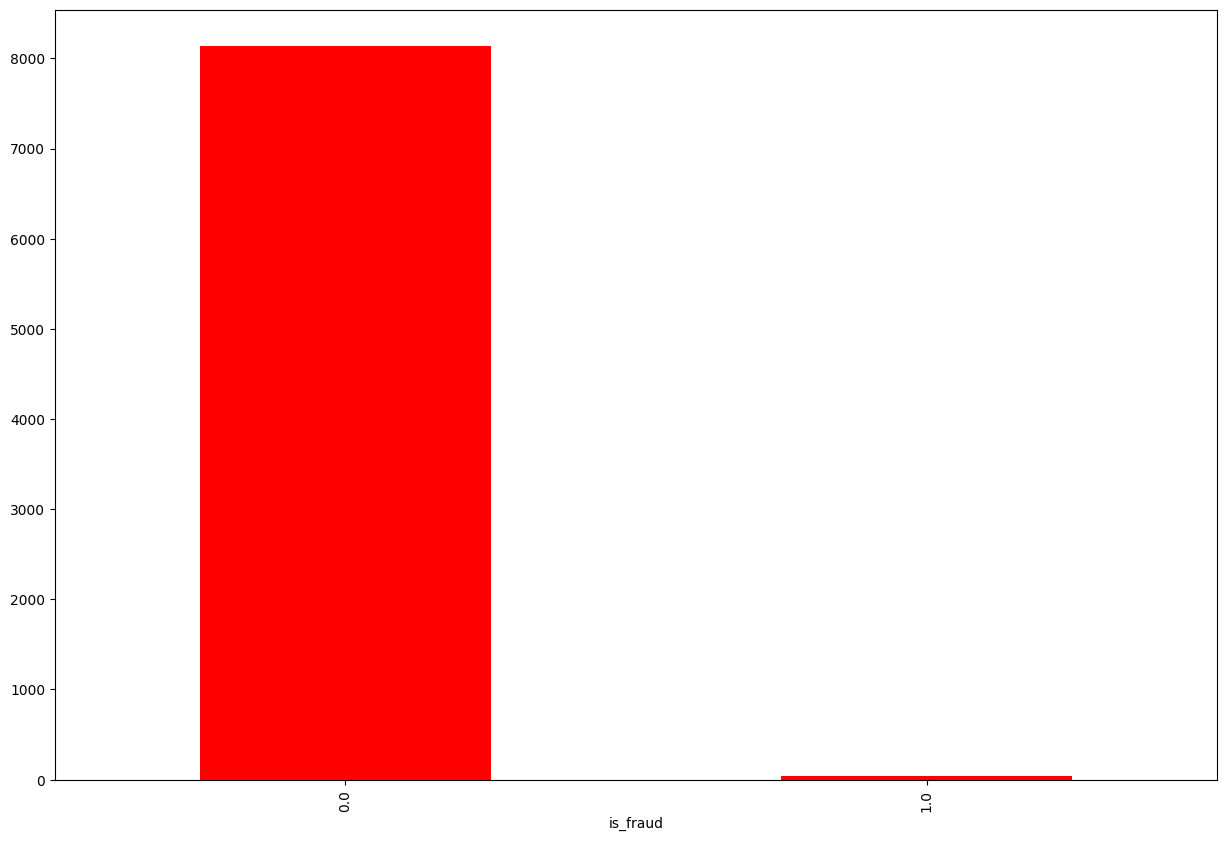

In [4]:
# plot
fraud_count = df_train ['is_fraud']
fraud_count.value_counts().plot(kind="bar",figsize=(15,10),color='red')

In [7]:
# drop unnecessary columns
df_train .drop(columns=['merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'], inplace= True)
df_train

,Unnamed,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,0,01-01-2019 00:00,misc_net,4.97,Moravian Falls,NC,36.0788,-81.1781,3495,09-03-1988,0.0
1,1,01-01-2019 00:00,grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,21-06-1978,0.0
2,2,01-01-2019 00:00,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,19-01-1962,0.0
3,3,01-01-2019 00:01,gas_transport,45.00,Boulder,MT,46.2306,-112.1138,1939,12-01-1967,0.0
4,4,01-01-2019 00:03,misc_pos,41.96,Doe Hill,VA,38.4207,-79.4629,99,28-03-1986,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8176,8176,06-01-2019 07:37,grocery_pos,80.29,Eugene,OR,44.0385,-123.0614,191096,06-04-1964,0.0
8177,8177,06-01-2019 07:37,entertainment,102.11,Tulsa,OK,36.2395,-95.9596,413574,18-06-1968,0.0
8178,8178,06-01-2019 07:38,misc_net,8.19,Monetta,SC,33.8084,-81.5956,1514,15-12-1966,0.0
8179,8179,06-01-2019 07:38,gas_transport,123.73,Lonsdale,MN,44.4477,-93.4252,5211,27-01-1987,0.0


In [10]:
# convert all dtype in float
df_train ['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train ['trans_date_trans_time'] = df_train ['trans_date_trans_time'].apply(lambda x: x.timestamp())

# Tell pandas the correct format of your dates
df_train ['dob'] = pd.to_datetime(df_train ['dob'], format='%d-%m-%Y')

# Handle NaT values before applying .timestamp()
df_train ['dob'] = df_train ['dob'].apply(lambda x: x.timestamp() if pd.notna(x) else None) # Convert NaT to None

label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['category','city', 'state']
for col in columns_to_convert_in_string_to_int:
    df_train [col] = label_encoder.fit_transform(df_train [col])
columns_to_convert_in_int_to_float = ['category','city', 'state','city_pop']
for col in columns_to_convert_in_int_to_float:
    df_train [col] = df_train [col].astype('float64')

In [11]:
df_train .dtypes

Unnamed                    int64
trans_date_trans_time    float64
category                 float64
amt                      float64
city                     float64
state                    float64
lat                      float64
long                     float64
city_pop                 float64
dob                      float64
is_fraud                 float64
dtype: object

In [12]:
X = df_train .drop(columns=['is_fraud'])
Y = df_train ['is_fraud']

In [13]:
X

,Unnamed,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,0,0.0,8.0,4.97,490.0,26.0,36.0788,-81.1781,3495.0,5.738688e+08
1,1,0.0,4.0,107.23,564.0,46.0,48.8878,-118.2105,149.0,2.672352e+08
2,2,0.0,0.0,220.11,437.0,12.0,42.1808,-112.2620,4154.0,-2.509056e+08
3,3,0.0,2.0,45.00,81.0,25.0,46.2306,-112.1138,1939.0,-9.374400e+07
4,4,0.0,9.0,41.96,202.0,44.0,38.4207,-79.4629,99.0,5.123520e+08
...,...,...,...,...,...,...,...,...,...,...
8176,8176,0.0,4.0,80.29,238.0,36.0,44.0385,-123.0614,191096.0,-1.810944e+08
8177,8177,0.0,0.0,102.11,752.0,35.0,36.2395,-95.9596,413574.0,-4.855680e+07
8178,8178,0.0,8.0,8.19,481.0,39.0,33.8084,-81.5956,1514.0,-9.616320e+07
8179,8179,0.0,2.0,123.73,425.0,22.0,44.4477,-93.4252,5211.0,5.387040e+08


In [14]:
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8176    0.0
8177    0.0
8178    0.0
8179    0.0
8180    NaN
Name: is_fraud, Length: 8181, dtype: float64

In [15]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [16]:
X

array([[-1.7318391 ,  0.        ,  0.48144391, ...,  0.65713374,
        -0.28641616,  0.88025183],
       [-1.73141567,  0.        , -0.55335218, ..., -1.88433454,
        -0.29768536,  0.32104765],
       [-1.73099224,  0.        , -1.58814827, ..., -1.47609948,
        -0.28419667, -0.62387979],
       ...,
       [ 1.73099224,  0.        ,  0.48144391, ...,  0.62848145,
        -0.29308809, -0.34167785],
       [ 1.73141567,  0.        , -1.07075022, ..., -0.18336313,
        -0.28063674,  0.81612219],
       [ 1.7318391 ,  0.        , -1.58814827, ..., -0.06099212,
        -0.28856829, -2.66105952]])

In [17]:
X_train, _ , Y_train, _ = train_test_split(X, Y, random_state=42)

for test

In [18]:
# load the dataset
dataset_path_test= '/content/fraudTest.csv'

df_test = pd.read_csv(dataset_path_test)

df_test .head()

,Unnamed,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [19]:
# cheak if there any null value or not
df_test .isnull().sum()

Unnamed                  0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [20]:
# cheak the datatype
df_test .dtypes

Unnamed                    int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

<Axes: xlabel='is_fraud'>

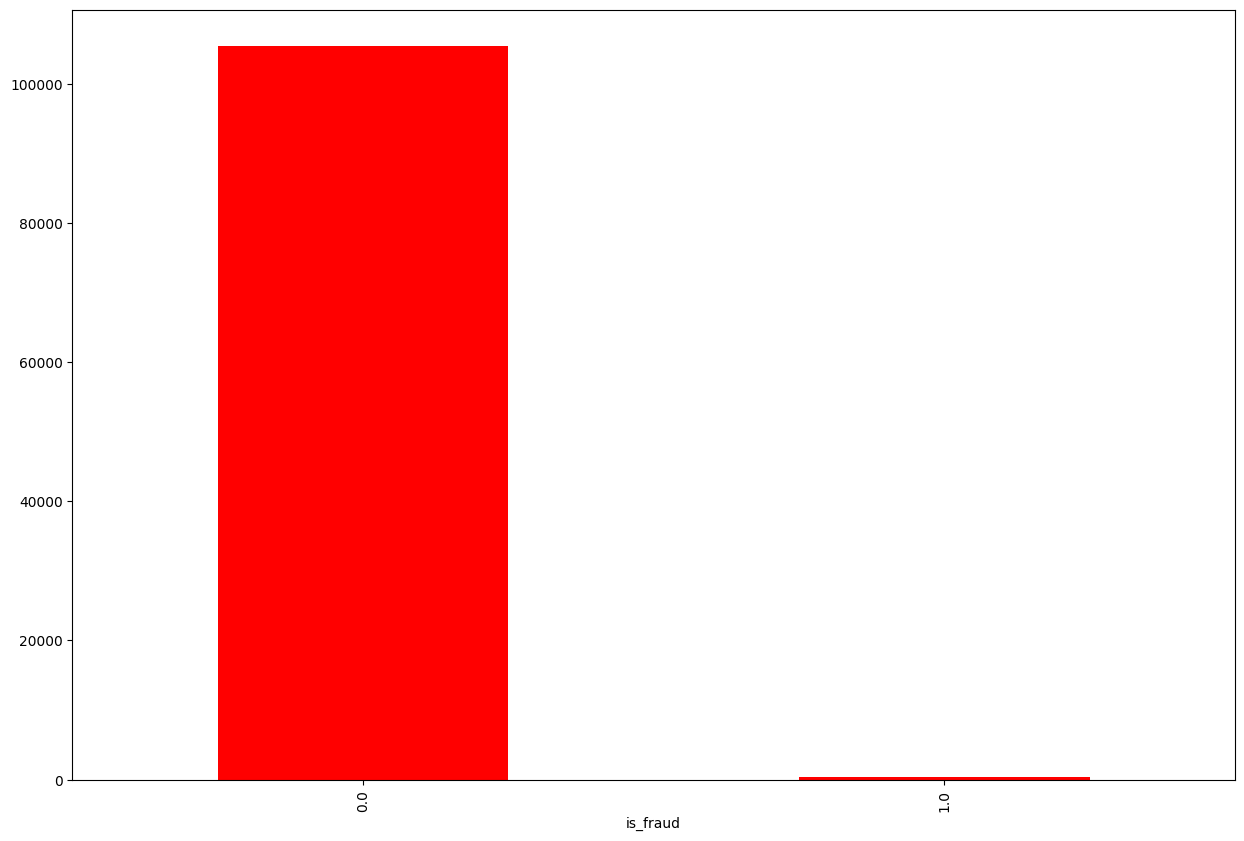

In [21]:
fraud_count = df_test ['is_fraud']
fraud_count.value_counts().plot(kind="bar",figsize=(15,10),color='red')

In [23]:
# drop unnecessary columns
df_test .drop(columns=['merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'], inplace= True)
df_test

,Unnamed,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,0,21-06-2020 12:14,personal_care,2.86,Columbia,SC,33.9659,-80.9355,333497.0,19-03-1968,0.0
1,1,21-06-2020 12:14,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302.0,17-01-1990,0.0
2,2,21-06-2020 12:14,health_fitness,41.28,Bellmore,NY,40.6729,-73.5365,34496.0,21-10-1970,0.0
3,3,21-06-2020 12:15,misc_pos,60.05,Titusville,FL,28.5697,-80.8191,54767.0,25-07-1987,0.0
4,4,21-06-2020 12:15,travel,3.19,Falmouth,MI,44.2529,-85.0170,1126.0,06-07-1955,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105813,105813,27-07-2020 23:45,personal_care,9.13,Cross,SC,33.3364,-80.1859,4471.0,09-10-1973,0.0
105814,105814,27-07-2020 23:45,kids_pets,102.16,Auburn,ME,44.0948,-70.2390,23045.0,02-09-1958,0.0
105815,105815,27-07-2020 23:45,shopping_pos,204.14,Independence,MO,39.1412,-94.3515,123373.0,27-11-1992,0.0
105816,105816,27-07-2020 23:45,misc_net,6.63,Ruckersville,VA,38.2586,-78.4074,9815.0,07-07-1975,0.0


In [24]:
# convert all dtype in float
df_test ['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test ['trans_date_trans_time'] = df_test ['trans_date_trans_time'].apply(lambda x: x.timestamp())
df_test ['dob'] = pd.to_datetime(df_test ['dob'])

# Handle missing values in 'dob' before converting to timestamps
df_test ['dob'] = df_test ['dob'].apply(lambda x: x.timestamp() if pd.notna(x) else None)
# The above line checks if a value is not NaT and then applies the timestamp conversion, otherwise it leaves the value as None.

<ipython-input-24-63acf2ab99f9>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_test ['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
<ipython-input-24-63acf2ab99f9>:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_test ['dob'] = pd.to_datetime(df_test ['dob'])


In [25]:
label_encoder = LabelEncoder()
columns_to_convert = ['category','city', 'state']
for col in columns_to_convert:
    df_test [col] = label_encoder.fit_transform(df_test [col])

In [26]:
columns_to_convert = ['category','city', 'state','city_pop']
for col in columns_to_convert:
    df_test [col] = df_test [col].astype('float64')

In [27]:
df_test .dtypes

Unnamed                    int64
trans_date_trans_time    float64
category                 float64
amt                      float64
city                     float64
state                    float64
lat                      float64
long                     float64
city_pop                 float64
dob                      float64
is_fraud                 float64
dtype: object

In [28]:
X_test_initial = df_test .drop(columns=['is_fraud'])
Y_test_initial = df_test ['is_fraud']

In [29]:
X_test_initial

,Unnamed,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,0,1.592742e+09,10.0,2.86,157.0,39.0,33.9659,-80.9355,333497.0,-56419200.0
1,1,1.592742e+09,10.0,29.84,16.0,43.0,40.3207,-110.4360,302.0,632534400.0
2,2,1.592742e+09,5.0,41.28,61.0,33.0,40.6729,-73.5365,34496.0,25315200.0
3,3,1.592742e+09,9.0,60.05,755.0,8.0,28.5697,-80.8191,54767.0,554169600.0
4,4,1.592742e+09,13.0,3.19,246.0,21.0,44.2529,-85.0170,1126.0,-457315200.0
...,...,...,...,...,...,...,...,...,...,...
105813,105813,1.595894e+09,10.0,9.13,173.0,39.0,33.3364,-80.1859,4471.0,118972800.0
105814,105814,1.595894e+09,7.0,102.16,37.0,20.0,44.0948,-70.2390,23045.0,-357609600.0
105815,105815,1.595894e+09,12.0,204.14,353.0,23.0,39.1412,-94.3515,123373.0,722822400.0
105816,105816,1.595894e+09,8.0,6.63,663.0,44.0,38.2586,-78.4074,9815.0,173923200.0


In [30]:
Y_test_initial

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
105813    0.0
105814    0.0
105815    0.0
105816    0.0
105817    NaN
Name: is_fraud, Length: 105818, dtype: float64

In [31]:
scaler = StandardScaler()
X_test_initial= scaler.fit_transform(X_test_initial)

In [32]:
X_test_initial

array([[-1.73203444, -1.68943953,  0.96160322, ...,  0.67642439,
         0.80854414, -0.32719214],
       [-1.7320017 , -1.68943953,  0.96160322, ..., -1.47489909,
        -0.2935716 ,  0.92410887],
       [-1.73196897, -1.68943953, -0.31446147, ...,  1.21599635,
        -0.18046742, -0.17874334],
       ...,
       [ 1.73196897,  1.71086119,  1.47202909, ..., -0.30193719,
         0.1135128 ,  1.08809301],
       [ 1.7320017 ,  1.71086119,  0.45117734, ...,  0.86078604,
        -0.26210526,  0.09116357],
       [ 1.73203444,  1.71086119,  1.98245496, ...,         nan,
                nan,         nan]])

In [33]:
X_test, _ , Y_test, _ = train_test_split(X_test_initial, Y_test_initial, random_state=42)

Shape of the train and test set

In [34]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6135, 10), (79363, 10), (6135,), (79363,))

In [35]:
df0 = pd.concat([df_train, df_test], ignore_index=True)

In [36]:
# Display first few rows of the main dataset
df0.head(10)

,Unnamed,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,0,0.0,8.0,4.97,490.0,26.0,36.0788,-81.1781,3495.0,573868800.0,0.0
1,1,0.0,4.0,107.23,564.0,46.0,48.8878,-118.2105,149.0,267235200.0,0.0
2,2,0.0,0.0,220.11,437.0,12.0,42.1808,-112.2620,4154.0,-250905600.0,0.0
3,3,0.0,2.0,45.00,81.0,25.0,46.2306,-112.1138,1939.0,-93744000.0,0.0
4,4,0.0,9.0,41.96,202.0,44.0,38.4207,-79.4629,99.0,512352000.0,0.0
5,5,0.0,2.0,94.63,208.0,37.0,40.3750,-75.2045,2158.0,-269395200.0,0.0
6,6,0.0,3.0,44.54,330.0,15.0,37.9931,-100.9893,2691.0,745459200.0,0.0
7,7,0.0,2.0,71.65,220.0,44.0,38.8432,-78.6003,6018.0,-705801600.0,0.0
8,8,0.0,9.0,4.27,443.0,37.0,40.3359,-79.6607,1472.0,-909532800.0,0.0
9,9,0.0,4.0,198.39,139.0,41.0,36.5220,-87.3490,151785.0,133660800.0,0.0


In [37]:
df0.shape

(113999, 11)

In [38]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed                113999 non-null  int64  
 1   trans_date_trans_time  113999 non-null  float64
 2   category               113999 non-null  float64
 3   amt                    113998 non-null  float64
 4   city                   113999 non-null  float64
 5   state                  113999 non-null  float64
 6   lat                    113998 non-null  float64
 7   long                   113998 non-null  float64
 8   city_pop               113998 non-null  float64
 9   dob                    113998 non-null  float64
 10  is_fraud               113997 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 9.6 MB


In [39]:
# Gather descriptive statistics about the data
df0.describe()

,Unnamed,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
count,113999.000000,1.139990e+05,113999.000000,113998.000000,113999.000000,113999.000000,113998.000000,113998.000000,1.139980e+05,1.139980e+05,113997.000000
mean,49405.099545,1.479894e+09,6.225467,69.063476,417.879560,25.798305,38.544858,-90.250034,8.901821e+04,1.213944e+08,0.004079
std,32020.660050,4.114878e+08,3.914622,148.672484,241.752651,14.145367,5.075308,13.776888,3.019396e+05,5.504951e+08,0.063737
min,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,20.027100,-165.672300,2.300000e+01,-1.425514e+09,0.000000
25%,20318.500000,1.593354e+09,3.000000,9.620000,211.000000,14.000000,34.668900,-96.809400,7.430000e+02,-2.275776e+08,0.000000
50%,48818.000000,1.594143e+09,6.000000,47.260000,414.000000,27.000000,39.371600,-87.476900,2.408000e+03,1.865376e+08,0.000000
75%,77317.500000,1.595079e+09,10.000000,82.860000,631.000000,37.000000,41.940400,-80.175200,1.968500e+04,5.461344e+08,0.000000
max,105817.000000,1.595894e+09,14.000000,13149.150000,839.000000,50.000000,65.689900,-67.950300,2.906700e+06,1.106957e+09,1.000000


In [40]:
# Drop only the columns that exist in the DataFrame
df0 = df0.drop(["lat", "long" , "city" , "state"], axis=1)

In [41]:
df0.head(10)

,Unnamed,trans_date_trans_time,category,amt,city_pop,dob,is_fraud
0,0,0.0,8.0,4.97,3495.0,573868800.0,0.0
1,1,0.0,4.0,107.23,149.0,267235200.0,0.0
2,2,0.0,0.0,220.11,4154.0,-250905600.0,0.0
3,3,0.0,2.0,45.00,1939.0,-93744000.0,0.0
4,4,0.0,9.0,41.96,99.0,512352000.0,0.0
5,5,0.0,2.0,94.63,2158.0,-269395200.0,0.0
6,6,0.0,3.0,44.54,2691.0,745459200.0,0.0
7,7,0.0,2.0,71.65,6018.0,-705801600.0,0.0
8,8,0.0,9.0,4.27,1472.0,-909532800.0,0.0
9,9,0.0,4.0,198.39,151785.0,133660800.0,0.0


In [42]:
df0['trans_date_trans_time'] = pd.to_datetime(df0['trans_date_trans_time'])
df0['dob'] = pd.to_datetime(df0['dob'])

In [43]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed                113999 non-null  int64         
 1   trans_date_trans_time  113999 non-null  datetime64[ns]
 2   category               113999 non-null  float64       
 3   amt                    113998 non-null  float64       
 4   city_pop               113998 non-null  float64       
 5   dob                    113998 non-null  datetime64[ns]
 6   is_fraud               113997 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 6.1 MB


In [44]:
df0['hr_day'] = df0['trans_date_trans_time'].dt.hour

In [45]:
# create a function which will be applied on the time_of_day variable to transform it to categorical

def time_of_day(hour):
    if  0 <= hour['hr_day'] <= 7:
        val = "night"
    elif 8 <= hour['hr_day'] <= 15:
        val = "morning"
    else:
        val = "midday"
    return val

now to time to crete variable itself

In [46]:
df0['time_of_day'] = df0.apply(time_of_day , axis = 1)

In [47]:
df0.head()

,Unnamed,trans_date_trans_time,category,amt,city_pop,dob,is_fraud,hr_day,time_of_day
0,0,1970-01-01,8.0,4.97,3495.0,1970-01-01 00:00:00.573868800,0.0,0,night
1,1,1970-01-01,4.0,107.23,149.0,1970-01-01 00:00:00.267235200,0.0,0,night
2,2,1970-01-01,0.0,220.11,4154.0,1969-12-31 23:59:59.749094400,0.0,0,night
3,3,1970-01-01,2.0,45.00,1939.0,1969-12-31 23:59:59.906256000,0.0,0,night
4,4,1970-01-01,9.0,41.96,99.0,1970-01-01 00:00:00.512352000,0.0,0,night


In [48]:
# extracting year from dob variable
df0['year_birth']= df0['dob'].dt.year

In [49]:
# create the function
def age(age):
    if  2024 - age['year_birth'] <= 29 :
        val = "Young"
    elif 30 <= 2024 - age['year_birth'] <=59 :
        val = "Middle-Aged"
    else:
        val = "Old"
    return val

In [50]:
df0['age'] = df0.apply(age , axis = 1)
df0.head()

,Unnamed,trans_date_trans_time,category,amt,city_pop,dob,is_fraud,hr_day,time_of_day,year_birth,age
0,0,1970-01-01,8.0,4.97,3495.0,1970-01-01 00:00:00.573868800,0.0,0,night,1970.0,Middle-Aged
1,1,1970-01-01,4.0,107.23,149.0,1970-01-01 00:00:00.267235200,0.0,0,night,1970.0,Middle-Aged
2,2,1970-01-01,0.0,220.11,4154.0,1969-12-31 23:59:59.749094400,0.0,0,night,1969.0,Middle-Aged
3,3,1970-01-01,2.0,45.00,1939.0,1969-12-31 23:59:59.906256000,0.0,0,night,1969.0,Middle-Aged
4,4,1970-01-01,9.0,41.96,99.0,1970-01-01 00:00:00.512352000,0.0,0,night,1970.0,Middle-Aged


In [51]:
df0 = df0.drop(['trans_date_trans_time' , 'dob' , 'hr_day' , 'year_birth'] ,axis = 1)

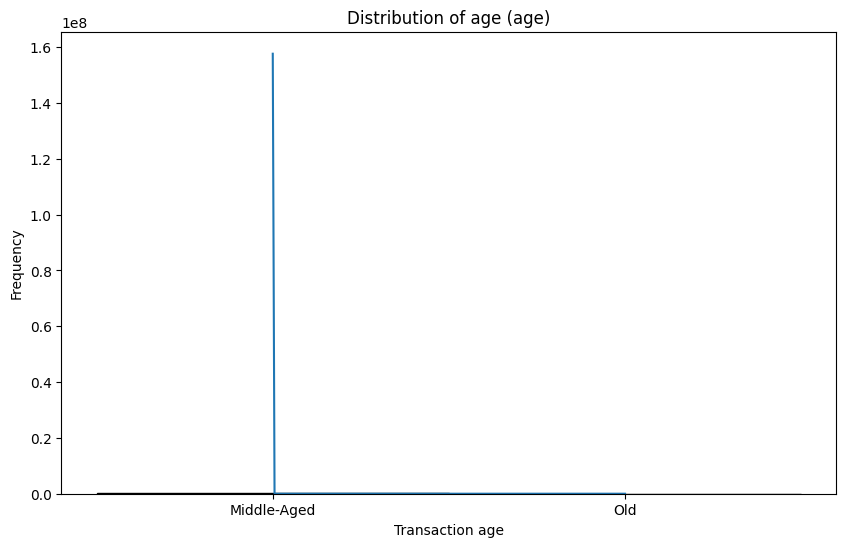

In [52]:
# Histogram of 'age' (Transaction age)
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='age', bins=30, kde=True)
plt.title('Distribution of age (age)')
plt.xlabel('Transaction age')
plt.ylabel('Frequency')
plt.show()

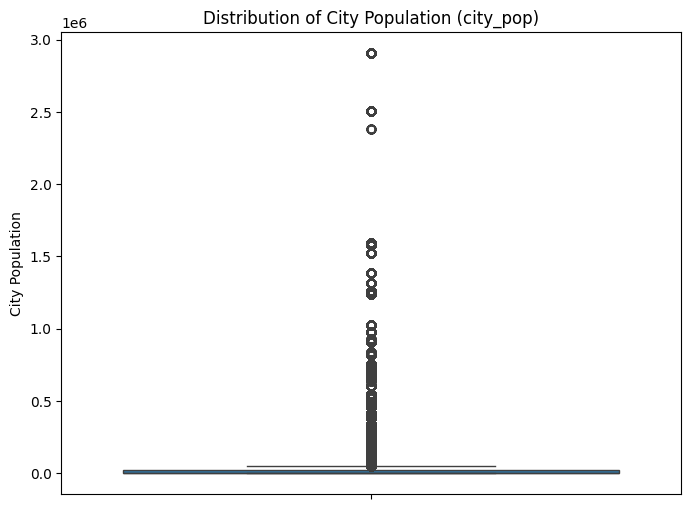

In [53]:
# Box plot of 'city_pop' (City Population)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df0, y='city_pop')
plt.title('Distribution of City Population (city_pop)')
plt.ylabel('City Population')
plt.show()

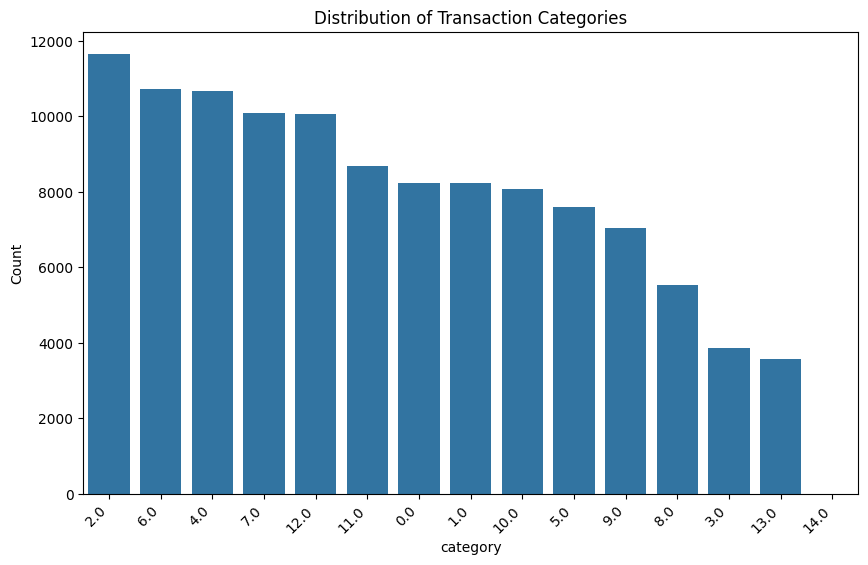

In [54]:
# Bar plot of 'category' (Transaction Category)
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='category', order=df0['category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.xlabel('category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

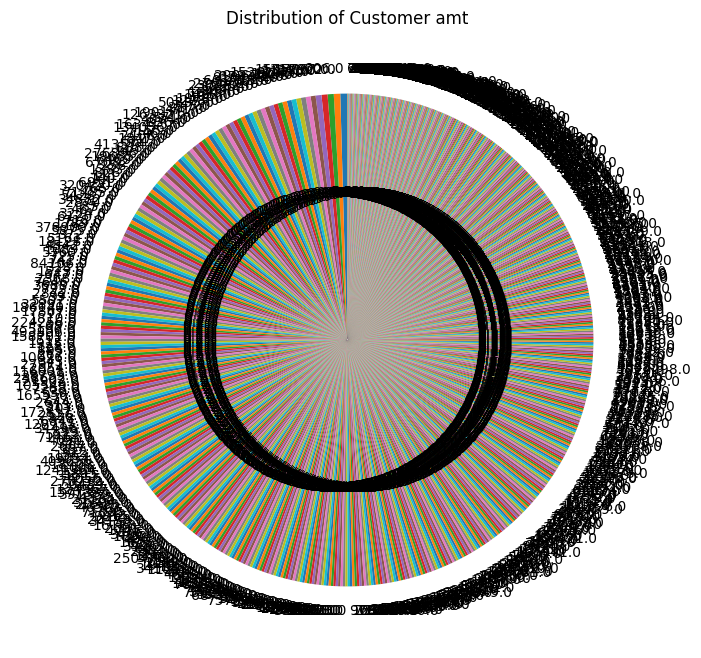

In [55]:
# Pie chart of 'amt' (users amt)
plt.figure(figsize=(8, 8))
df0['city_pop'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer amt')
plt.ylabel('')
plt.show()

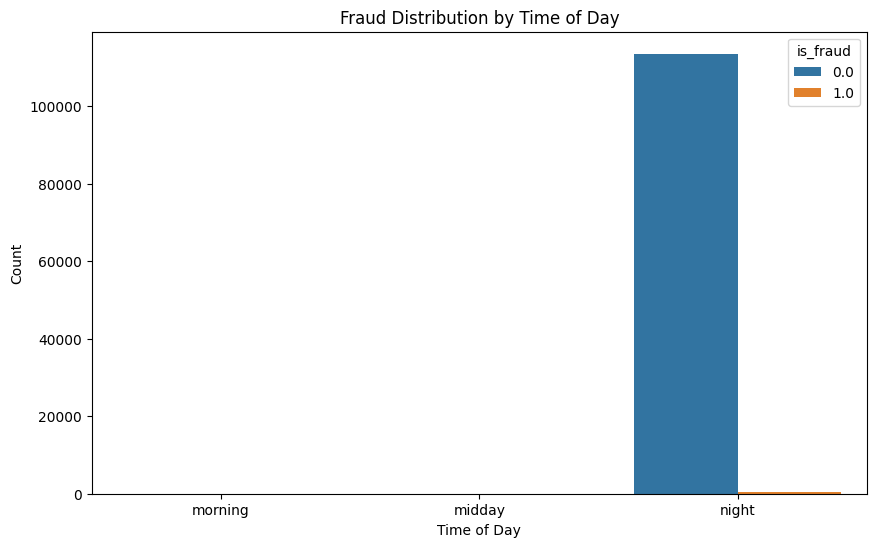

In [56]:
# Stacked bar plot of 'time_of_day' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='time_of_day', hue='is_fraud', order=['morning', 'midday', 'night'])
plt.title('Fraud Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.show()

In [57]:
df0.columns

Index(['Unnamed', 'category', 'amt', 'city_pop', 'is_fraud', 'time_of_day',
       'age'],
      dtype='object')

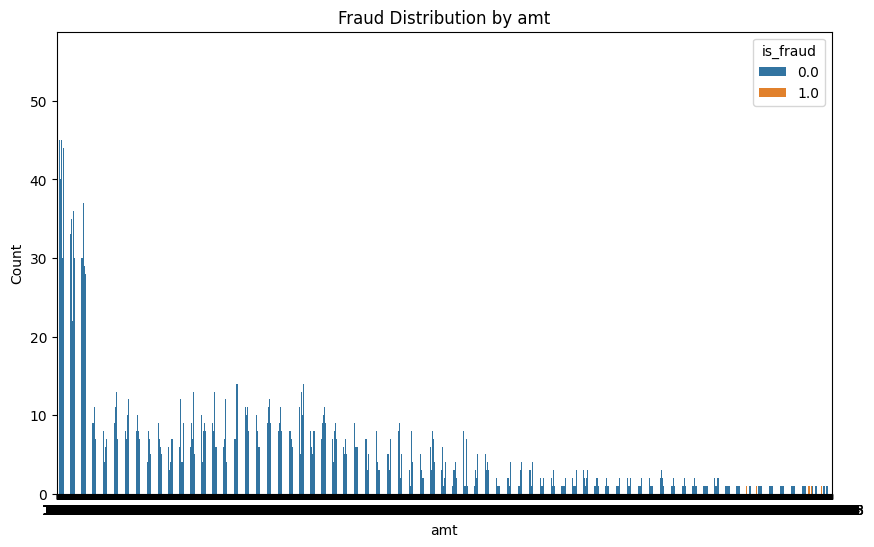

In [58]:
# Stacked bar plot of 'amt' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='amt', hue='is_fraud')
plt.title('Fraud Distribution by amt')
plt.xlabel('amt')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.show()

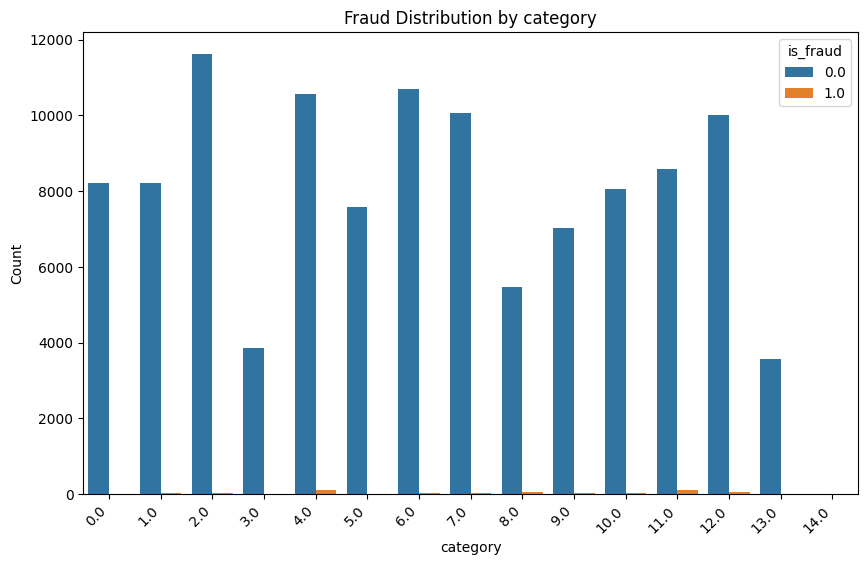

In [59]:
# Stacked bar plot of 'category' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='category', hue='is_fraud')
plt.title('Fraud Distribution by category')
plt.xlabel('category')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.xticks(rotation=45, ha='right')
plt.show()

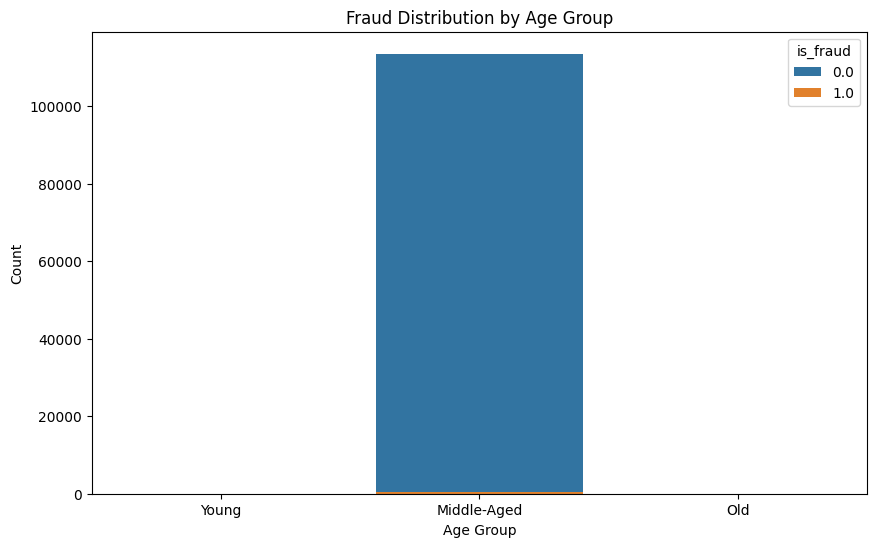

In [60]:
# Stacked bar plot of 'age' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='age', hue='is_fraud', order=['Young', 'Middle-Aged', 'Old'])
plt.title('Fraud Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.show()

Models

Tensorflow model (custom)

In [61]:
model = Sequential([
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=1024, validation_split=0.2)

Epoch 1/15
5/5 [==============================] - 2s 87ms/step - loss: 0.5581 - accuracy: 0.9104 - val_loss: 0.3648 - val_accuracy: 0.9935
Epoch 2/15
5/5 [==============================] - 0s 19ms/step - loss: 0.2705 - accuracy: 0.9945 - val_loss: 0.1503 - val_accuracy: 0.9935
Epoch 3/15
5/5 [==============================] - 0s 22ms/step - loss: 0.1137 - accuracy: 0.9945 - val_loss: 0.0843 - val_accuracy: 0.9935
Epoch 4/15
5/5 [==============================] - 0s 27ms/step - loss: 0.0793 - accuracy: 0.9945 - val_loss: 0.0854 - val_accuracy: 0.9935
Epoch 5/15
5/5 [==============================] - 0s 23ms/step - loss: 0.0776 - accuracy: 0.9945 - val_loss: 0.0847 - val_accuracy: 0.9935
Epoch 6/15
5/5 [==============================] - 0s 21ms/step - loss: 0.0716 - accuracy: 0.9945 - val_loss: 0.0774 - val_accuracy: 0.9935
Epoch 7/15
5/5 [==============================] - 0s 26ms/step - loss: 0.0607 - accuracy: 0.9945 - val_loss: 0.0669 - val_accuracy: 0.9935
Epoch 8/15
5/5 [===========

Logistic Regression

In [64]:
import numpy as np

# Assume X_train and Y_train are NumPy arrays

# Identify rows with NaN values in X_train
nan_rows = np.isnan(X_train).any(axis=1)

# Remove rows with NaN values from X_train and Y_train
X_train = X_train[~nan_rows]
Y_train = Y_train[~nan_rows]

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [65]:
# Import the LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression class
log_reg = LogisticRegression()

# Train the logistic regression model using the training data
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [66]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

DecisionTreeClassifier

In [67]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

RandomForestClassifier

In [68]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Models evaluation and predection

RandomForestClassifier

In [69]:
# Evaluate
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\n Accuracy: {accuracy}')

# Predict
y_pred_tf = (model.predict(X_test) > 0.5).astype("int32")

2481/2481 [==============================] - 5s 2ms/step - loss: 0.0224 - accuracy: 0.9961

 Accuracy: 0.9960687160491943
2481/2481 [==============================] - 3s 1ms/step


Logistic Regression

In [70]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(X_test)

In [71]:
# Find indices of samples with missing target values
nan_indices = np.where(np.isnan(Y_test))[0]

# Remove these samples from both X_test and Y_test
X_test = np.delete(X_test, nan_indices, axis=0)
Y_test = np.delete(Y_test, nan_indices, axis=0)

In [83]:
from sklearn.linear_model import LogisticRegression

# Assume X_train and Y_train are your training data
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Make predictions on your test data (X_test)
y_pred_log_reg = log_reg.predict(X_test)

print(Y_test.shape)
print(y_pred_log_reg.shape)

(79363,)
(79363,)


In [87]:
from sklearn.linear_model import LogisticRegression

# Assume X_train, Y_train, and X_test are your training and testing data
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Make predictions on your test data (X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Now you can truncate y_pred_log_reg if needed
y_pred_log_reg = y_pred_log_reg[:len(Y_test)]

print(Y_test.shape)
print(y_pred_log_reg.shape)

(79363,)
(79363,)


In [88]:
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

Accuracy: 0.9951992742209846
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     79051
         1.0       0.06      0.02      0.03       312

    accuracy                           1.00     79363
   macro avg       0.53      0.51      0.51     79363
weighted avg       0.99      1.00      0.99     79363



Decision Tree

In [89]:
# Predict
y_pred_tree = decision_tree.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_tree)}")
print(classification_report(Y_test, y_pred_tree))

Accuracy: 0.995690687096002
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     79051
         1.0       0.22      0.04      0.07       312

    accuracy                           1.00     79363
   macro avg       0.61      0.52      0.53     79363
weighted avg       0.99      1.00      0.99     79363



Random Forest

In [90]:
# Predict
y_pred_forest = random_forest.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_forest)}")
print(classification_report(Y_test, y_pred_forest))

Accuracy: 0.9956780867658732
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     79051
         1.0       0.00      0.00      0.00       312

    accuracy                           1.00     79363
   macro avg       0.50      0.50      0.50     79363
weighted avg       0.99      1.00      0.99     79363



Visualization(confusion matrix)

In [91]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('True vs Predicted matrix')
    plt.show()

TensorFlow model

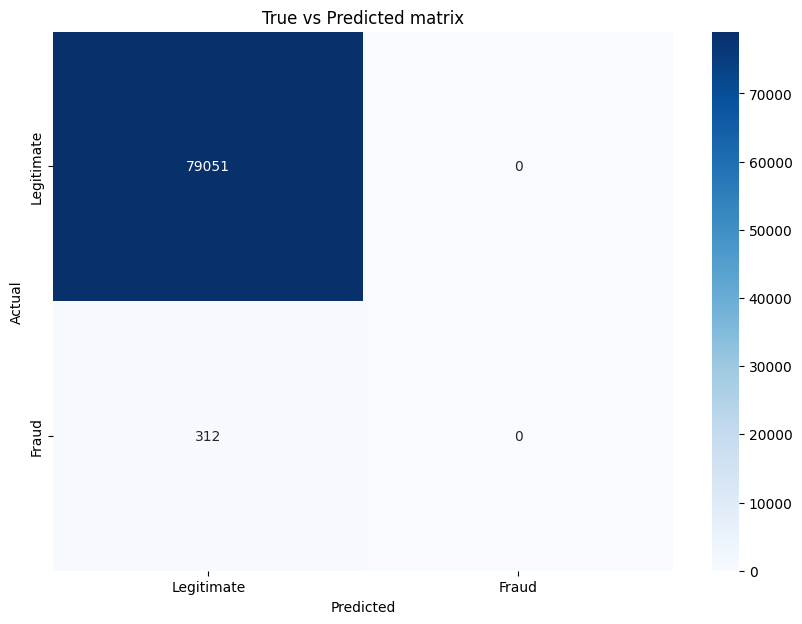

In [92]:
min_len = min(len(Y_test), len(y_pred_tf))
Y_test_trimmed = Y_test[:min_len]
y_pred_tf_trimmed = y_pred_tf[:min_len]
plot_confusion_matrix(Y_test_trimmed, y_pred_tf_trimmed)

Logistic Regression

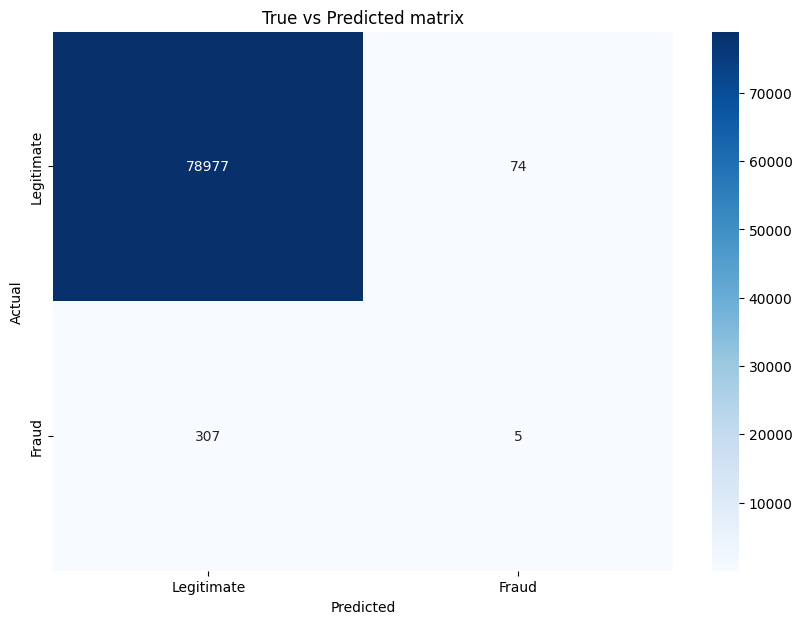

In [93]:
plot_confusion_matrix(Y_test, y_pred_log_reg)

Decision tree

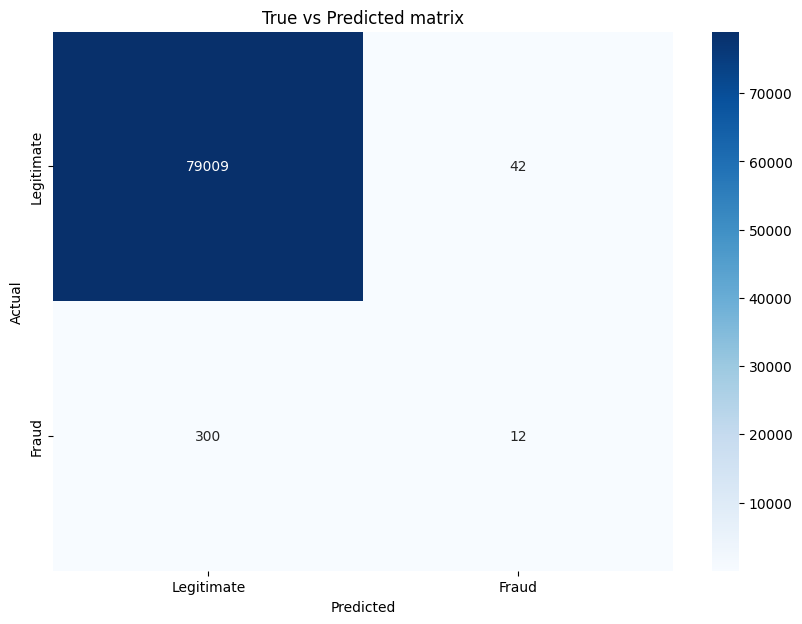

In [94]:
plot_confusion_matrix(Y_test, y_pred_tree)

Random Forest

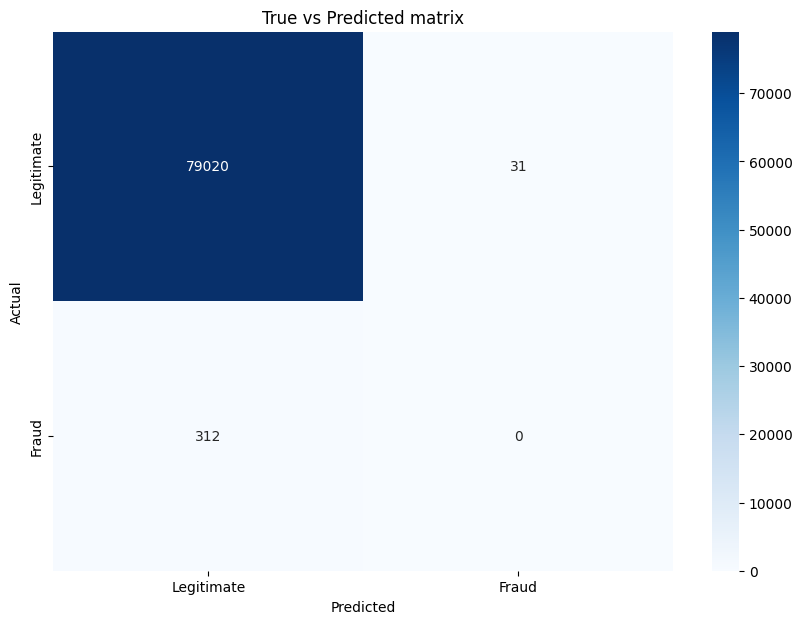

In [95]:
plot_confusion_matrix(Y_test, y_pred_forest)